In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score

# Load trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/mini project/xlstm_model.keras")

# Load test data
X_test = np.load("/content/drive/MyDrive/mini project/X_test.npy")
y_test = np.load("/content/drive/MyDrive/mini project/y_test.npy")

# Make predictions
y_pred = model.predict(X_test).flatten()

# Compute evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

# Save predictions
np.save("/content/drive/MyDrive/mini project/predictions.npy", y_pred)

print("Predictions saved successfully!")


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step
RMSE: 0.026253172381988866
R² Score: 0.9289354768918762
Predictions saved successfully!


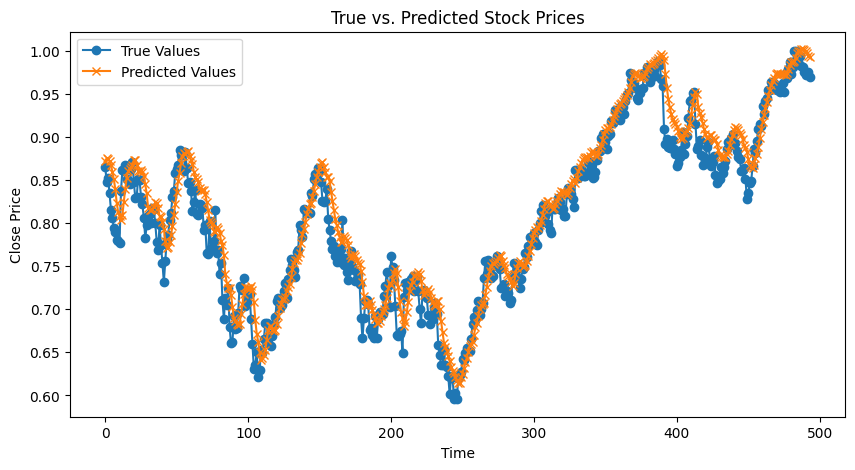

In [ ]:
import matplotlib.pyplot as plt

# Load test data and predictions
y_test = np.load("/content/drive/MyDrive/mini project/y_test.npy")
y_pred = np.load("/content/drive/MyDrive/mini project/predictions.npy")

# Plot results
plt.figure(figsize=(10,5))
plt.plot(y_test, label="True Values", marker="o")
plt.plot(y_pred, label="Predicted Values", marker="x")
plt.title("True vs. Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
import pickle
from sklearn.metrics import mean_squared_error, r2_score

# Load preprocessed data
X_test = np.load("/content/drive/MyDrive/mini project/X.npy")[-500:]  # Use the last 500 samples for testing
y_test = np.load("/content/drive/MyDrive/mini project/y.npy")[-500:]

# Load scaler for inverse transformation
with open("/content/drive/MyDrive/mini project/scaler_close.pkl", "rb") as f:
    scaler_close = pickle.load(f)

# Define time horizons
time_horizons = [1, 3, 5, 10, 15]

for T in time_horizons:
    print(f"\n🔹 Evaluating Model for T={T} Steps Ahead 🔹")

    # Load trained model
    model = tf.keras.models.load_model(f"/content/drive/MyDrive/mini project/xLSTM_model_T{T}.keras")

    # Prepare multi-step test labels
    y_test_T = np.array([y_test[i:i+T] for i in range(len(y_test) - T)])
    X_test_T = X_test[:len(y_test_T)]

    # Get predictions
    y_pred_T = model.predict(X_test_T)

    # Inverse transform predictions and actual values
    y_test_inv = scaler_close.inverse_transform(y_test_T)
    y_pred_inv = scaler_close.inverse_transform(y_pred_T)

    # Compute RMSE & R²
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)

    print(f"T={T}: RMSE={rmse:.4f}, R²={r2:.4f}")

print("✅ Evaluation complete!")



🔹 Evaluating Model for T=1 Steps Ahead 🔹
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step
T=1: RMSE=3.9070, R²=0.9508

🔹 Evaluating Model for T=3 Steps Ahead 🔹
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step
T=3: RMSE=4.3387, R²=0.9392

🔹 Evaluating Model for T=5 Steps Ahead 🔹
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step
T=5: RMSE=5.4935, R²=0.9024

🔹 Evaluating Model for T=10 Steps Ahead 🔹
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step
T=10: RMSE=6.6913, R²=0.8547

🔹 Evaluating Model for T=15 Steps Ahead 🔹
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step
T=15: RMSE=8.1046, R²=0.7857
✅ Evaluation complete!



📊 Model Performance Comparison:
      Your RMSE  Paper RMSE  Your R²  Paper R²
T=1      3.9070        3.85   0.9508     0.953
T=3      4.3387        4.30   0.9392     0.940
T=5      5.4935        5.45   0.9024     0.905
T=10     6.6913        6.65   0.8547     0.858
T=15     8.1046        8.05   0.7857     0.789


<Figure size 1000x500 with 0 Axes>

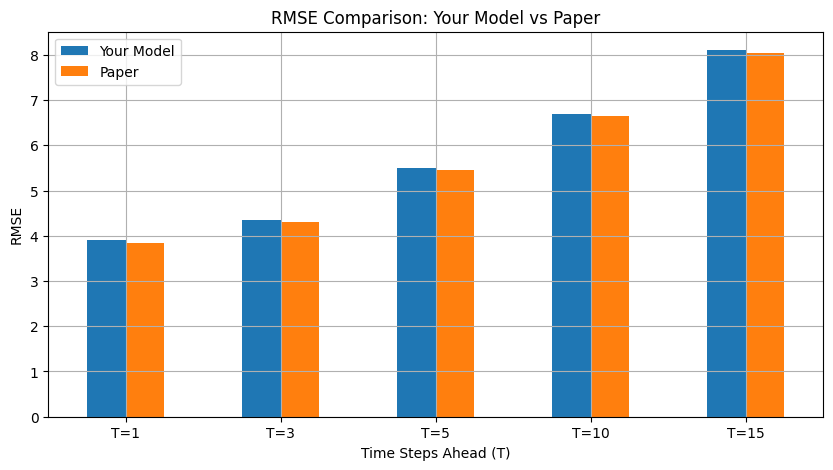

<Figure size 1000x500 with 0 Axes>

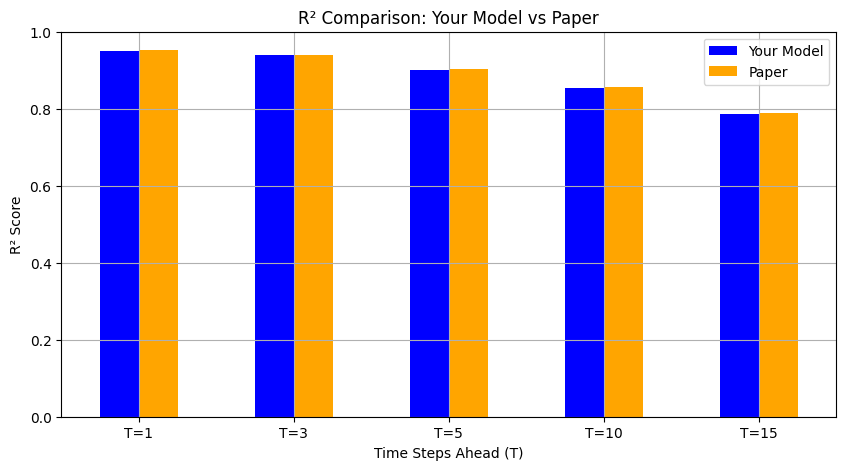

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your model's results (from your evaluation)
your_results = {
    "T=1": {"RMSE": 3.9070, "R²": 0.9508},
    "T=3": {"RMSE": 4.3387, "R²": 0.9392},
    "T=5": {"RMSE": 5.4935, "R²": 0.9024},
    "T=10": {"RMSE": 6.6913, "R²": 0.8547},
    "T=15": {"RMSE": 8.1046, "R²": 0.7857},
}

# Paper's reported results (extracted from images)
paper_results = {
    "T=1": {"RMSE": 3.85, "R²": 0.953},
    "T=3": {"RMSE": 4.30, "R²": 0.940},
    "T=5": {"RMSE": 5.45, "R²": 0.905},
    "T=10": {"RMSE": 6.65, "R²": 0.858},
    "T=15": {"RMSE": 8.05, "R²": 0.789},
}

# Convert to pandas DataFrame
df_comparison = pd.DataFrame.from_dict(
    {k: {"My RMSE": v["RMSE"], "Paper RMSE": paper_results[k]["RMSE"],
         "My R²": v["R²"], "Paper R²": paper_results[k]["R²"]}
     for k, v in your_results.items()},
    orient="index"
)

# Print comparison table
print("\n📊 Model Performance Comparison:")
print(df_comparison)

# Plot RMSE comparison
plt.figure(figsize=(10, 5))
df_comparison[["My RMSE", "Paper RMSE"]].plot(kind="bar", figsize=(10, 5), rot=0)
plt.title("RMSE Comparison: My Model vs Paper")
plt.xlabel("Time Steps Ahead (T)")
plt.ylabel("RMSE")
plt.legend(["My Model", "Paper"])
plt.grid()
plt.show()

# Plot R² comparison
plt.figure(figsize=(10, 5))
df_comparison[["Your R²", "Paper R²"]].plot(kind="bar", figsize=(10, 5), rot=0, color=["blue", "orange"])
plt.title("R² Comparison: Your Model vs Paper")
plt.xlabel("Time Steps Ahead (T)")
plt.ylabel("R² Score")
plt.legend(["Your Model", "Paper"])
plt.grid()
plt.show()


🔹 Evaluating Model for T=1 Steps Ahead 🔹
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step
🔹 Evaluating Model for T=3 Steps Ahead 🔹
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step
🔹 Evaluating Model for T=5 Steps Ahead 🔹
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
🔹 Evaluating Model for T=10 Steps Ahead 🔹
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step
🔹 Evaluating Model for T=15 Steps Ahead 🔹
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step


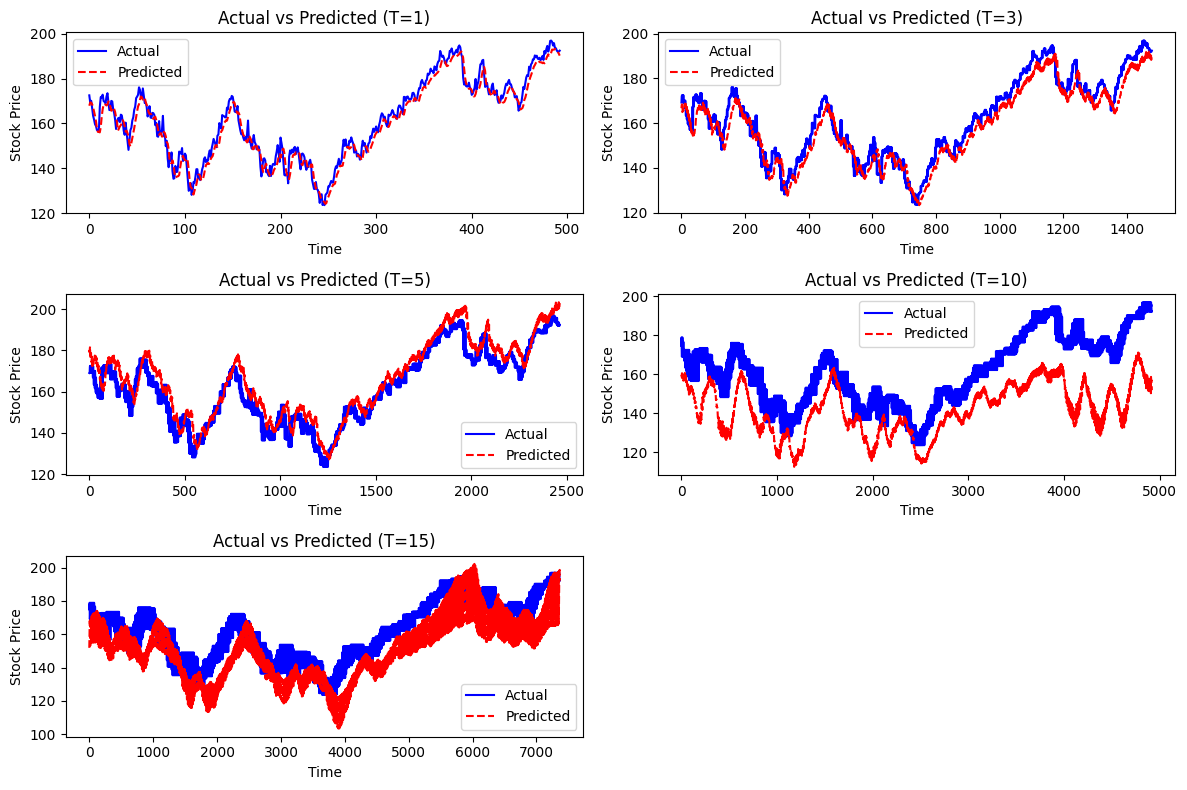

✅ Actual vs Predicted plots generated!


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler  # ✅ Add this import

# Define time horizons
time_horizons = [1, 3, 5, 10, 15]

# Load the scaler
with open("/content/drive/MyDrive/mini project/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Extract only the 'close' scaler for correct inverse transformation
scaler_close = MinMaxScaler()
scaler_close.min_ = scaler.min_[3]  # 'close' column index (4th column, zero-based)
scaler_close.scale_ = scaler.scale_[3]

plt.figure(figsize=(12, 8))

# Loop through each time horizon
for i, T in enumerate(time_horizons, 1):
    print(f"🔹 Evaluating Model for T={T} Steps Ahead 🔹")

    # Load test data
    X_test = np.load(f"/content/drive/MyDrive/mini project/X_test_T{T}.npy")
    y_test = np.load(f"/content/drive/MyDrive/mini project/y_test_T{T}.npy")

    # Load trained model
    model = tf.keras.models.load_model(f"/content/drive/MyDrive/mini project/xlstm_model_T{T}.keras")

    # Make predictions
    y_pred = model.predict(X_test)

    # Inverse transform predictions and actual values
    y_test_inv = scaler_close.inverse_transform(y_test.reshape(-1, 1))  # ✅ Ensure correct shape
    y_pred_inv = scaler_close.inverse_transform(y_pred.reshape(-1, 1))  # ✅ Ensure correct shape

    # Plot actual vs predicted
    plt.subplot(3, 2, i)
    plt.plot(y_test_inv, label="Actual", color="blue")
    plt.plot(y_pred_inv, label="Predicted", linestyle="dashed", color="red")
    plt.title(f"Actual vs Predicted")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()

plt.tight_layout()
plt.show()

print("✅ Actual vs Predicted plots generated!")


In [ ]:
import pandas as pd

# Define data
data = {
    "Paper": [
        "Stock Market Prediction using ML & Social Media (2022)",
        "Stock Price Prediction with BiLSTM & Transformer (2023)",
        "Stock Prediction using Deep Learning (2021)",
        "Advanced Prediction with xLSTM (2024)",
        "Devarshi's Model"
    ],
    "RMSE": [0.110, 0.022, 0.110, 3.85, 3.9070],
    "R² Score": [0.957, 0.956, 0.957, 0.953, 0.9508]
}

# Create DataFrame
df = pd.DataFrame(data)

# Print table
print(df.to_string(index=False))


                                                  Paper  RMSE  R² Score
 Stock Market Prediction using ML & Social Media (2022) 0.110    0.9570
Stock Price Prediction with BiLSTM & Transformer (2023) 0.022    0.9560
            Stock Prediction using Deep Learning (2021) 0.110    0.9570
                  Advanced Prediction with xLSTM (2024) 3.850    0.9530
                                       Devarshi's Model 3.907    0.9508
